In [20]:
import numpy as np
from glob import glob
import shutil
import cv2
import pandas as pd
import os
import seaborn as sns
sns.set(rc={'figure.figsize':(4,3)})

In [94]:
((50+30+60)*(5+3)+(100+30)*2+(30*2+60*4)*1)/4/24/5

3.5

In [5]:
# check pic is binary
img = cv2.imread('..\\binary2\\11_in_2.5x-0007.png')
np.unique(img)

array([  0, 255], dtype=uint8)

In [2]:
# 把binary图片缩小成短边=286并颠倒黑白
def resize_binary(img):
    w, h = img.shape
    shrink = min(w,h)/286
#     print([int(h//shrink),int(w//shrink)])
    new_img = cv2.resize(img, (int(h//shrink),int(w//shrink)))//128
    new_img = (new_img*-1+1)*255
    return new_img

In [46]:
# 10/07dataset里几个边边白框需要剪切的重新保存一下
# folder = '..\\drive-download-20221007T001944Z-001\\defect set A binary\\0615 setA (Cx samples)\\hor\\'
# files = glob(folder + '*.png')
# for file in files:
#     name = list(list(file.split('\\'))[-1].split('.png'))[0]
#     sample = list(name.split('_'))[0]
#     sample = 'R' + sample
# #     if sample[0] == 'a': #
# #         sample = 'A' + sample[1:] #
    
#     num = list(name.split('-'))[-1]
#     new_name = sample + '_h_' + num
# #     if name[3] == 'v':
# #         new_name = sample + '_v_' + num
# #     else:
# #         new_name = sample + '_h_' + num
#     print(name, new_name)
#     img = cv2.imread(file, 0)
#     new_img = resize_binary(img)
#     cv2.imwrite('..\\binary3\\' + new_name + '.png', new_img)

11_in_2.5x-0001 R11_h_0001
11_in_2.5x-0002 R11_h_0002
11_in_2.5x-0003 R11_h_0003
11_in_2.5x-0004 R11_h_0004
14_in_2.5x-0001(2) R14_h_0001(2)


In [42]:
# 把10/07日的dataset重新命名一下分h和v重新保存
# folder = '..\\drive-download-20221007T001944Z-001\\foam (3s1, 6s1,....) binary\\'
# files = glob(folder + '*.*')
# for file in files:
#     name = list(list(file.split('\\'))[-1].split('.tif'))[0]
#     sample = get_sample_name(name)
# #     sample = 'R' + sample
# #     if sample[0] == 'a': #
# #         sample = 'A' + sample[1:] #
    
#     num = list(name.split('-'))[-1]
#     if name[3] == 'v':
#         new_name = sample + '_v_' + num
#     else:
#         new_name = sample + '_h_' + num
# #     print(name, new_name)
#     img = cv2.imread(file, 0)
#     new_img = resize_binary(img)
#     cv2.imwrite('..\\binary3\\' + new_name + '.png', new_img)

In [82]:
# 输入图片的名字找到对应sample在excel里的名字
def get_sample_name(name):
    if name[1] == 's' or name[0] == 'x' or name[0] == 'y':
        folder = list(name.split(' '))[0][:3]
        if folder[0] == 'y':
            folder = '6s8'
        elif folder[0] == 'x':
            folder = '3s8'
    else:
        folder = list(name.split('_'))[0]
        if folder[0] != 'R':
            folder = 'R' + folder
    return folder

In [83]:
# 看一下10/07的dataset有哪些sample
files = glob('..\\binary3\\*.png')
samples = []
for file in files:
    name = list(file.split('\\'))[-1]
    sample = list(name.split('_'))[0]
    samples = samples + [sample]
samples = list(set(samples))
print(len(samples))

38


In [81]:
df = pd.read_excel('..\\database_para.xlsx', sheet_name = 'Sheet3')

In [85]:
for i in list(df['Sample']):
    if i not in samples:
        print('!'+i)

In [86]:
len(df['Sample'])

38

In [4]:
# files = glob('..\\binary\\*.*')
# for file in files:
#     name = list(file.split('\\'))[-1][:-4]
#     img = cv2.imread(file, 0)
#     new_img = resize_binary(img)
#     cv2.imwrite('..\\binary2\\' + name +'.png', new_img)
#     break

In [3]:
# 把p2p_target里的彩色图片转化成黑白的
# files = glob('p2p_target\\*.*')
# for file in files:
#     img = cv2.imread(file, 0)
#     cv2.imwrite(file, img)

In [95]:
set_list = np.random.rand(len(list(df['Sample'])))
dataset_list = []
for i in range(len(set_list)):
    if set_list[i] < 0.2:
        dataset_list = dataset_list + ['Test']
    else:
        dataset_list = dataset_list + ['Train']
print(sum(set_list<0.2)/sum(set_list>=0.2))
# print(sum(set_list>=0.2))
df['Set'] = dataset_list

0.11764705882352941


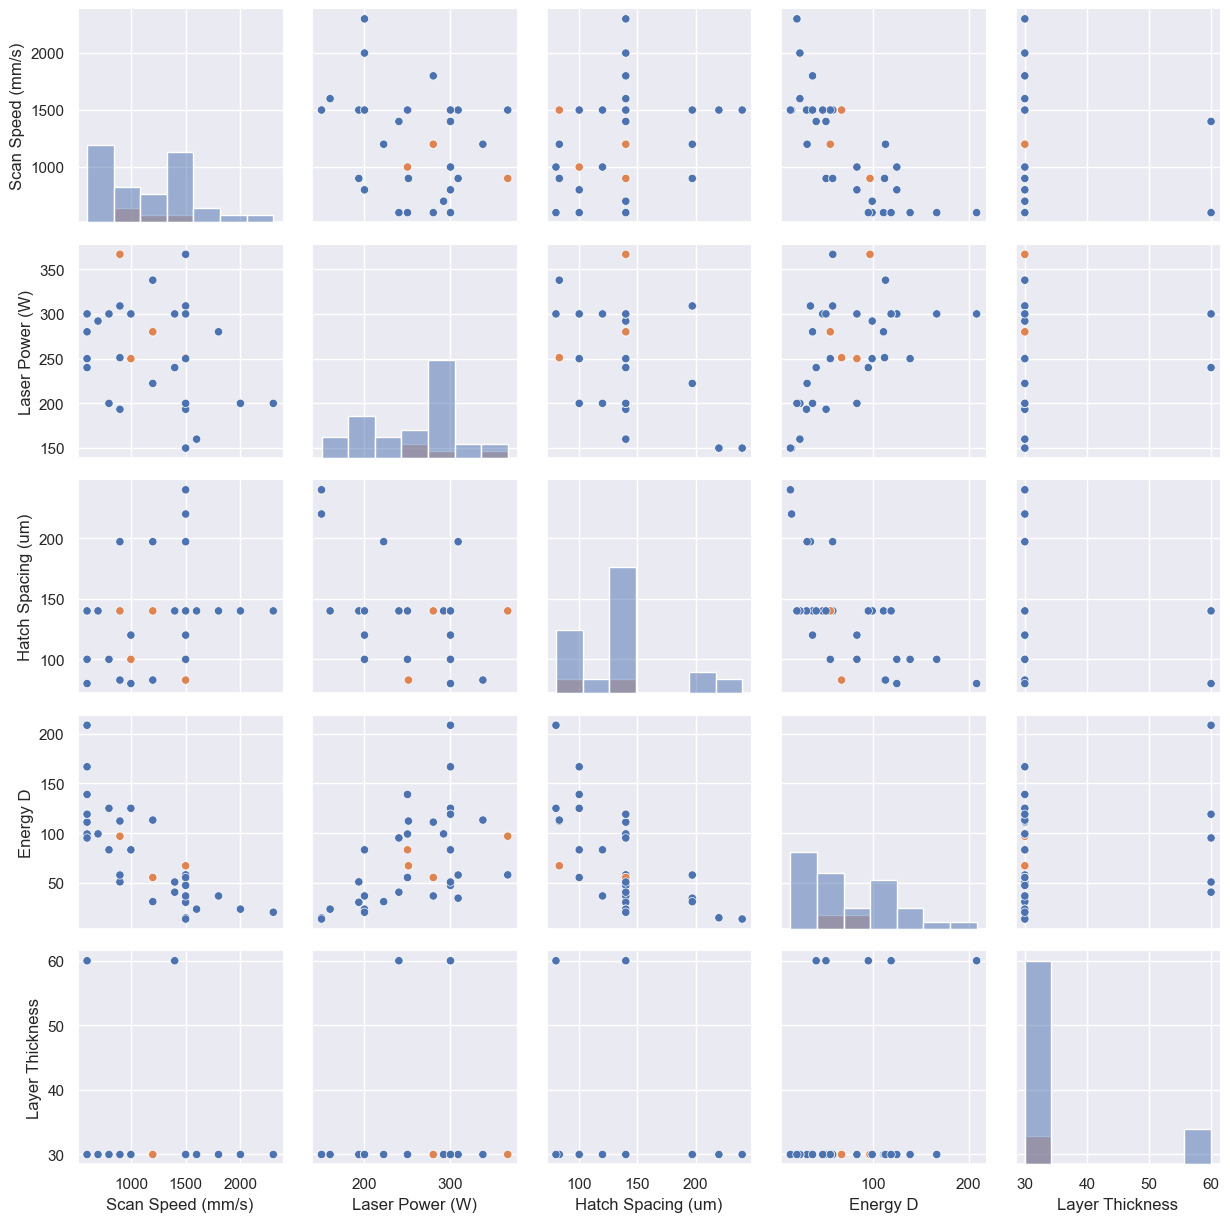

In [96]:
g = sns.PairGrid(df, hue="Set")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [20]:
import random
settings = list(df['Sample ID.'])
random.shuffle(settings)
group0 = settings[:len(settings)//5]
group1 = settings[len(settings)//5:2*len(settings)//5]
group2 = settings[2*len(settings)//5:3*len(settings)//5]
group3 = settings[3*len(settings)//5:4*len(settings)//5]
group4 = settings[4*len(settings)//5:]
print(group0)
print(group1)
print(group2)
print(group3)
print(group4)

['3s7', '6s4', 'R11', 'R7']
['R4', 'R1', 'R8', '6s1', 'R5']
['R2', '6s2', 'R3', 'R14']
['6s8', 'R13', '3s4', '3s3', '3s8']
['R6', '3s1', '3s2', '6s3', '3s5']


In [21]:
# 重新按照四个参数setting分配point folder groups
point_path = '..\\point_folder\\'
target_path = '..\\binary2\\'
zero = np.zeros([1])
folders = []
for i in range(5):
    shutil.rmtree(point_path+'group' + str(i))
    os.mkdir(point_path+'group' + str(i))
files = glob(target_path + '*.*')
for file in files:
    name = list(file.split('\\'))[-1]
    folder = get_sample_name(name)

    if folder in group0:
        cv2.imwrite(point_path + 'group0\\' + name, zero)
    elif folder in group1:
        cv2.imwrite(point_path + 'group1\\' + name, zero)
    elif folder in group2:
        cv2.imwrite(point_path + 'group2\\' + name, zero)
    elif folder in group3:
        cv2.imwrite(point_path + 'group3\\' + name, zero)
    elif folder in group4:
        cv2.imwrite(point_path + 'group4\\' + name, zero)
    else:
        print(name, folder)
# print(folders)

In [23]:
# 从表格里找对应名字的part的density GT
files = glob(target_path+'*.*')
for file in files:
    name = list(file.split('\\'))[-1]
    folder = get_sample_name(name)

    sp = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Scan Speed'].to_numpy()[0]-600)/1700*255
    lp = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Laser Power '].to_numpy()[0]-150)/150*255
    hp = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Hatch Spacing (um)'].to_numpy()[0]-80)/160*255
    lt = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Layer Thickness (um)'].to_numpy()[0]-30)/30*255
    ed = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Energy Density (J/mm3)'].to_numpy()[0]-10)/160*255
    
    pic = np.concatenate([sp, lp, hp, lt], axis=-1)
    cv2.imwrite('..\\p2p_input_map\\setting0\\'+name, pic)
    cv2.imwrite('..\\p2p_input_map\\setting1\\'+name, ed)

In [25]:
# # 从表格里找对应名字的part的density GT
# files = glob('pics2\\*.*')
# for file in files:
#     name = list(file.split('\\'))[-1]
#     ori_name = list(name.split('.tif'))[0]
# #     print(ori_name)
#     folder = list(name.split(' '))[0][:3]
#     if folder[0] == 'y':
#         folder = '6s8'
#     elif folder[0] == 'x':
#         folder = '3s8'
#     sp = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Scan Speed'].to_numpy()[0]-600)/1700*255
#     lp = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Laser Power '].to_numpy()[0]-160)/206.6*255
#     hp = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Hatch Spacing (um)'].to_numpy()[0]-80)/117.12*255
#     lt = np.ones([256,256,1])*(df[df['Sample ID.']==folder]['Layer Thickness (um)'].to_numpy()[0]-30)/30*255
    
#     pic = np.concatenate([sp, lp, hp, lt], axis=-1)
# #     print(pic.shape)
# #     np.round((density[folder_names.index(folder)]-75)/25*255
# #     print(np.round((density[folder_names.index(folder)]-95)/5*255))
# #     if folder == 'C14' or folder == 'C15':
# #         folder = 'C1'
#     cv2.imwrite('p2p_input_map\\'+ori_name+'.png', pic)

In [3]:
df.head()
# 逻辑就是point放在一起之后所有在pointfolder里的图片每个名字提取出来去找他属于哪个sample
# 然后用sample对应的四个参数去分别减去她们最小的limit然后/range
# 四个分别的生成一个256*256的层 然后concat到一起

,Sample ID.,Scan Speed,Laser Power,Hatch Spacing (um),Layer Thickness (um),Energy Density (J/mm3),Part Density (%),Pred,Raw preds,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,A1,1200,280.0,140.00,30,37.037037,99.9080,99.544273,99.238208,99.893717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,1800,280.0,140.00,30,24.691358,96.2680,95.452494,93.890045,97.619629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,1500,366.6,140.00,30,38.793651,99.6250,100.117231,99.182389,100.082476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,1500,308.9,197.12,30,23.215789,92.7525,92.936470,94.380960,92.392250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A5,600,280.0,140.00,30,74.074074,91.4560,93.644234,91.025290,92.794673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 计算dice loss weight
weights = []
files = glob('binary2\\*.*')
for file in files:
    pic = cv2.imread(file, 0)
    class1 = np.count_nonzero(pic)
    class0 = np.count_nonzero(pic==0)
    weight = class1/class0
    weights.append(weight)
1/(sum(weights)/len(weights))

44.84753761082652

In [19]:
# 检查高木GT的图片是不是binary
pic = cv2.imread('binary2\\3s1h 2.5x-0002_0.png')
np.unique(pic)

array([  0, 255], dtype=uint8)

In [3]:
#用来把ENet生成的excel汇总在一起的
names = []
preds = []
for i in range(5):
    df = pd.read_excel('2Density_pred' + str(i) + '.xlsx')
    names=names + list(df['PicName'])
    preds=preds + list(df['Prediction'])
    
df = pd.DataFrame({'PicName': names, 'Prediction': preds})
df.to_excel('2Density.xlsx')

In [4]:
#随便写的用来验证TF那边读取图片是不是对的
pic = cv2.imread('pics1\\A2_2.5x-0003_0.png',0)
print(pic)

[[192 187 184 ... 175 173 173]
 [193 189 185 ... 174 176 174]
 [199 193 187 ... 174 175 175]
 ...
 [185 183 183 ... 177 182 189]
 [186 184 181 ... 181 184 185]
 [187 186 183 ... 183 182 183]]


In [23]:
def copy_to(sc_path, des_path):
    files = glob(sc_path + '*.*')
    for file in files:
        name = list(file.split('\\'))[-1]
        shutil.copyfile(file, des_path + name)

In [32]:
copy_to('Ti-6Al-4V set 2\\6s8v_2.5x\\', 'ori_pics2\\')

In [34]:
for i in range(7):
    for l in ['v', 'h']:
        copy_to('Ti-6Al-4V set 2\\3s' + str(i+1) + l + '\\', 'ori_pics2\\')

In [3]:
df = pd.read_excel('clean excel.xlsx')
df.head()

,Sample ID.,Scan Speed,Laser Power,Hatch Spacing (um),Layer Thickness (um),Energy Density (J/mm3),Part Density (%),Pred,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,A1,1200,280.0,140.00,30,37.037037,99.9080,99.238208,99.893717,99.102610,...,100.599617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,1800,280.0,140.00,30,24.691358,96.2680,93.890045,97.619629,95.751340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,1500,366.6,140.00,30,38.793651,99.6250,99.182389,100.082476,99.551027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,1500,308.9,197.12,30,23.215789,92.7525,94.380960,92.392250,92.515489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A5,600,280.0,140.00,30,74.074074,91.4560,91.025290,92.794673,96.842804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
folder_names = list(df['Sample ID.'])
energy = list(df['Energy Density (J/mm3)'])
density = list(df['Part Density (%)'])
print(len(density))

42


In [5]:
# folder_names
ori_names= []
files = glob('ori_pics2\\*.*')
for file in files:
    name,typ = list(file.split('\\'))[-1][:-4], list(file.split('\\'))[-1][-3:]
    ori_names.append(name)

In [20]:
# 把original pics resize and flip and save
files = glob('foam (3s1, 6s1,....) binary\\*.*')
for file in files:
    name,typ = list(file.split('\\'))[-1][:-4], list(file.split('\\'))[-1][-3:]

    if typ == 'gif':
        cap = cv2.VideoCapture(file)
        ret, image = cap.read()
        cap.release()
        if ret:
            pic = image
    else:        
        pic = cv2.imread(file)
    
    if pic is None:
        pass
    else:
        pic = cv2.resize(pic, [256,256])
        pic0 = np.round(cv2.flip(pic, 0)/255.)*255
        pic1 = np.round(cv2.flip(pic, 1)/255.)*255
        pic2 = np.round(cv2.flip(pic, -1)/255.)*255
        
        ret,pic = cv2.threshold(pic, 127, 255, cv2.THRESH_BINARY_INV)
        ret,pic0 = cv2.threshold(pic0, 127, 255, cv2.THRESH_BINARY_INV)
        ret,pic1 = cv2.threshold(pic1, 127, 255, cv2.THRESH_BINARY_INV)
        ret,pic2 = cv2.threshold(pic2, 127, 255, cv2.THRESH_BINARY_INV)
        
        cv2.imwrite('binary2\\' + name + '.png', pic)
        cv2.imwrite('binary2\\' + name + '_0.png', pic0)
        cv2.imwrite('binary2\\' + name + '_1.png', pic1)
        cv2.imwrite('binary2\\' + name + '_2.png', pic2)

In [9]:
ori_names = []
files = glob('pics2\\*.*')
for file in files:
    name = list(file.split('\\'))[-1]
    name = list(name.split('.png'))[0]
    ori_names.append(name)

In [10]:
# 把pics2里面的图片的名字平分到point_folder2
def split_into_5():
    pic = np.zeros(1)
    files = glob('foam (3s1, 6s1,....) binary\\*.*')
    for file in files:
        name = list(file.split('\\'))[-1]
        name = list(name.split('.tif'))[0]
#         num = np.random.choice(5)
#         cv2.imwrite('point_unet2\\'+'group'+str(num)+'\\'+name+'.png', pic)
        

        if name in ori_names:
            num = np.random.choice(5)
            cv2.imwrite('point_unet2\\'+'group'+str(num)+'\\'+name+'.png', pic)

In [11]:
split_into_5()

In [4]:
# 我还认真盯着这组代码看了好长时间想我当时是要干嘛用的 结果发现是用来把图片格式换成png的。。
# for i in range(5):
#     files = glob('point_folder\\group'+str(i)+'\\*.*')
#     pic = np.zeros(1)
#     for file in files:
#         name = list(file.split('\\'))[-1][:-8]
#         cv2.imwrite('point_folder\\group'+str(i)+'\\' + name + '.png', pic)
#         os.remove(file)